## US Presidential Campaign Data Exploration
### Dr. Bruns
### 8 October 2019

Instructions:
- Problems 1-12 are shown in code cells below
- Each problem begins with #@
- Insert your code below the problem line
- Do not make changes outside the problem cells, except to change the name and date above
- Be sure to include plot titles, labels, etc. as shown

An exploration of California campaign contribution data for the 2016 US presidential election.

In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

In [86]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [87]:
# This is a randomly-sample subset of the full data set.
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-sample.csv")

Which candidates received the most contributions?  

<AxesSubplot:title={'center':'Number of Contributions by Candidate'}>

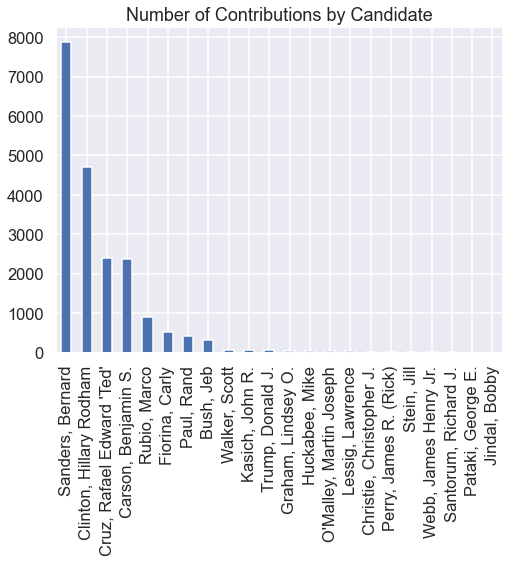

In [88]:
#@ 1 Show the number of contributions by candidate using a barplot.  
# Hint: use value_counts(), and use a pandas bar plot.

df['cand_nm'].value_counts().plot.bar(title='Number of Contributions by Candidate')

Let's look at the amount of the contributions, instead of the number of contributions.  Which candidates had the highest median contribution amounts?  

<AxesSubplot:title={'center':'Median Campaign Contribution by Candidate'}, xlabel='Candidate', ylabel='Contribution amount ($)'>

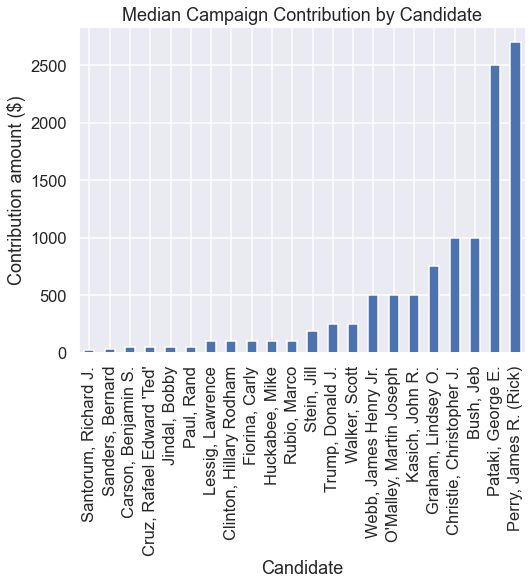

In [89]:
#@ 2 Show the median contribution amount by candidate.

df.groupby(df['cand_nm'])['contb_receipt_amt'].median().sort_values().plot.bar(xlabel='Candidate',ylabel='Contribution amount ($)', title='Median Campaign Contribution by Candidate')

What is the distribution of the contribution amounts?  There are a small number of very large amounts, which make it hard to display the distribution.  Also, there are some negative contribution amounts that seem to reflect returned contributions.  Therefore, let's focus on contributions ranging from 0 to 3,000 dollars.

[Text(0.5, 1.0, 'Contribution amounts from 0-$3000 only'),
 Text(0.5, 0, 'Contribution (dollars)'),
 Text(0, 0.5, '')]

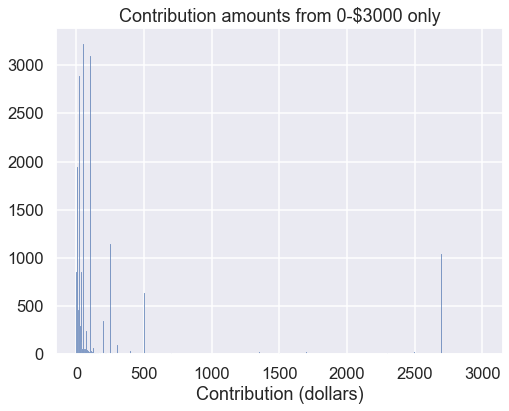

In [90]:
#@ 3 Create a histogram showing contribution amounts.  Show
# contributions from 0 - 3000 dollars only.  Create the
# histogram with Seaborn.
hist = sns.histplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 3000)]['contb_receipt_amt'])
hist.set(title='Contribution amounts from 0-$3000 only', xlabel='Contribution (dollars)',ylabel='')

It appears that most contributions are small.  Let's restrict our attention to an even smaller range of contributions to get a better idea of how small contributions are distributed.

[Text(0.5, 1.0, 'Contribution amounts from 0-$500 only'),
 Text(0.5, 0, 'Contribution (dollars)'),
 Text(0, 0.5, '')]

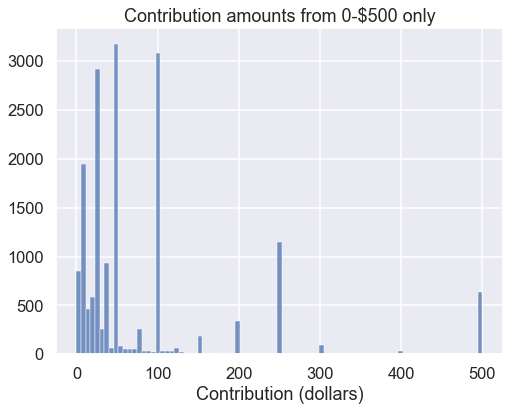

In [91]:
#@ 4 Create a histogram showing contribution amounts.  Show
# contributions from 0 - 500 dollars only.  Create the
# histogram with Seaborn.
sns.histplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 500)]['contb_receipt_amt']).set(title='Contribution amounts from 0-$500 only', xlabel='Contribution (dollars)',ylabel='')


The appearance of a histogram is sensitive to the number of bins that are used and where the bin edges lie.  Let's look at the contribution amounts again using a density plot.

[Text(0.5, 1.0, 'Contribution amounts from 0-$500 only'),
 Text(0.5, 0, 'Contribution (dollars)'),
 Text(0, 0.5, '')]

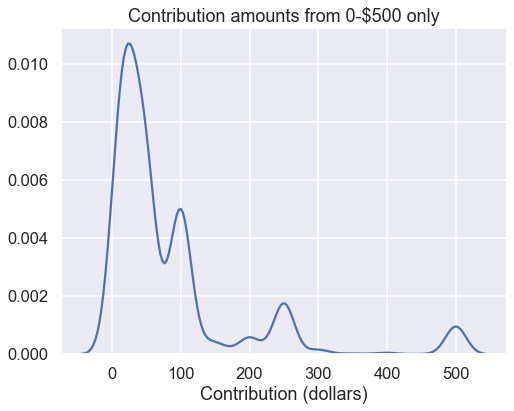

In [92]:
#@ 5 Create a density plot (sometimes called a kernel density
# plot) showing contribution amounts.  Show contributions from 
# 0 - 500 dollars only.  Create the density plot with Seaborn.
# histogram use Seaborn.
# Hint: you may want to start by creating a series containing
# the contb_receipt_amt values from 0-500.
sns.kdeplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 500)]['contb_receipt_amt']).set(title='Contribution amounts from 0-$500 only', xlabel='Contribution (dollars)',ylabel='')

Let's compare the size of contributions between candidates Rubio and Cruz.  Did one of them tend to get larger-sized contributions?

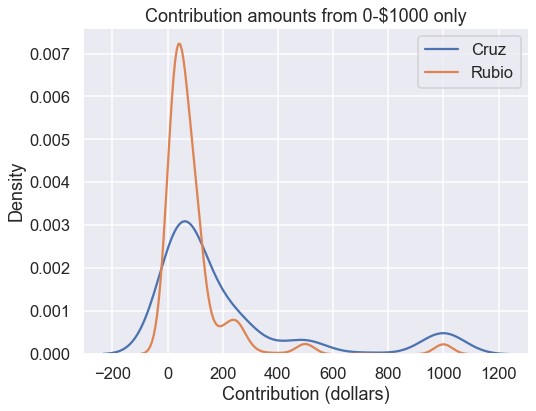

In [93]:
#@ 6 Create a "double density plot" showing the contributions for
# Rubio and Cruz.  Show contributions in the range of 0-1000 dollars
# only.  Be sure to include a legend.
# Hint: you can create two series, one for 0-1000 contributions to
# Rubio, and another for 0-1000 contributions to Cruz.
# Remember that you can superimpose plots by simply plotting one
# after another.
sns.kdeplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000) & (df['cand_nm'] == 'Rubio, Marco')]['contb_receipt_amt']).set(title='Contribution amounts from 0-$1000 only', xlabel='Contribution (dollars)',ylabel='')
sns.kdeplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000) & (df['cand_nm'] == "Cruz, Rafael Edward 'Ted'")]['contb_receipt_amt']).legend(labels=["Cruz","Rubio"])

Rubio and Cruz were Republican candidates.  Let's look at a pair of Democratic candidates.

[Text(0.5, 1.0, 'Contribution amounts from 0-$1000 For Clinton and Sanders'),
 Text(0.5, 0, 'Candidate'),
 Text(0, 0.5, 'Contribution amount ($)')]

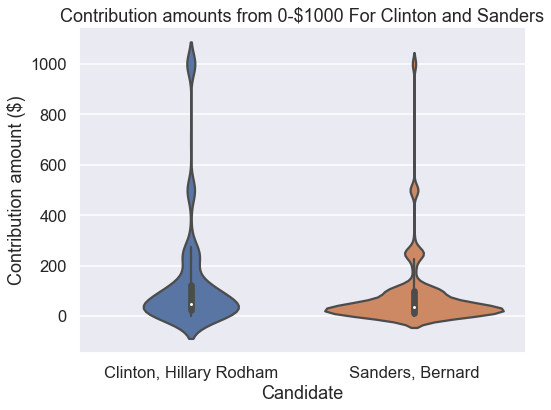

In [94]:
#@ 7 Show the contributions of 0-1000 for Clinton and Sanders.  
# Use a seaborn violin plot.
# Hint: create a modified version of the data frame that contains only
# contributions for Sanders and Clinton, and only contains contributions
# from 0 to 1000 dollars.  Then use Seaborn's violinplot.
df1 = pd.DataFrame(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000) & (df['cand_nm'] == 'Clinton, Hillary Rodham')]['contb_receipt_amt']).rename(columns={"contb_receipt_amt": "Clinton, Hillary Rodham"})
df2 = pd.DataFrame(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000) & (df['cand_nm'] == 'Sanders, Bernard')]['contb_receipt_amt']).rename(columns={"contb_receipt_amt": "Sanders, Bernard"})
temp = pd.concat([df1, df2])

sns.violinplot(data=temp).set(title='Contribution amounts from 0-$1000 For Clinton and Sanders',xlabel='Candidate',ylabel='Contribution amount ($)')


Which occupations are associated with the greatest number of contributions?  This will be interesting, but we need to keep in mind that the occupation with the greatest number of contributions might just be the most common occupation.

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Occupation'), Text(0, 0.5, 'Contributions')]

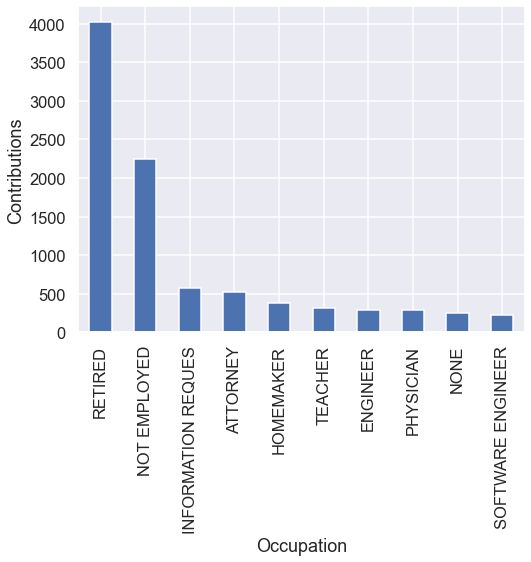

In [95]:
#@ 8 Create a bar plot showing the total number of contributions by occupation, 
# for the 10 occupations with the largest number of contributions.  Use
# Pandas for the bar plot.  Limit the occupation names to 18 characters.
# Hint: to limit the occupation names to 18 characters, you can create a 
# new column 'short_occ' by using pd.Series.str.slice on the 
# 'contbr_occupation' column.

df.groupby(df['contbr_occupation'].str.slice(stop=18))['contb_receipt_amt'].count().sort_values(ascending=False)[:10].plot.bar().set(title='',xlabel='Occupation',ylabel='Contributions')

We can classify contributors as either employed, unemployed, or retired.  Among these groups, which makes the most contributions?

[Text(0.5, 1.0, 'Number of contributions by employment status'),
 Text(0.5, 0, 'Employment status'),
 Text(0, 0.5, 'Contributions')]

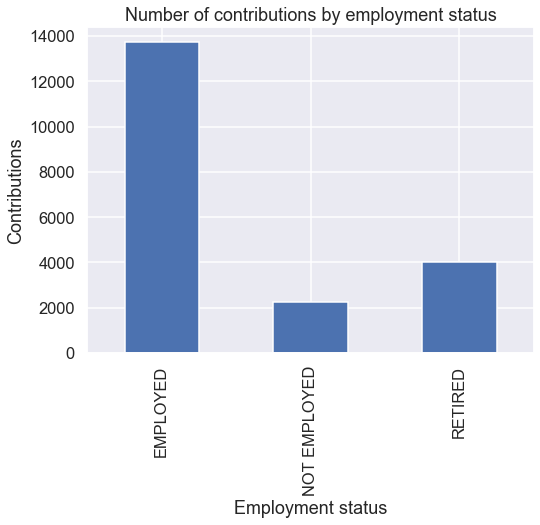

In [96]:
#@ 9 Create a new column "employment_status", derived from the 
# contbr_occupation column.  The value of employment_status should 
# be "EMPLOYED" if contbr_occupation is not "RETIRED" or "NOT EMPLOYED", 
# and should be the original contbr_occupation otherwise.  Show the 
# number of contributions by employment status as a bar plot.
# Hint: to create the new column, consider creating a function that 
# takes as input a contbr_occupation value and returns an employement 
# status value.  Then use this function with 'apply'.
def replace_employment(input):
    if ((input != 'RETIRED') and (input != 'NOT EMPLOYED')):
        input = 'EMPLOYED'
    return input

df['employment_status'] = df['contbr_occupation'].apply(replace_employment)
df.groupby(df['employment_status'])['contb_receipt_amt'].count().plot.bar().set(title='Number of contributions by employment status',xlabel='Employment status',ylabel='Contributions')


Do retired contributors tend to make smaller contributions than employed contributors?  It seems likely, but what does the data say?

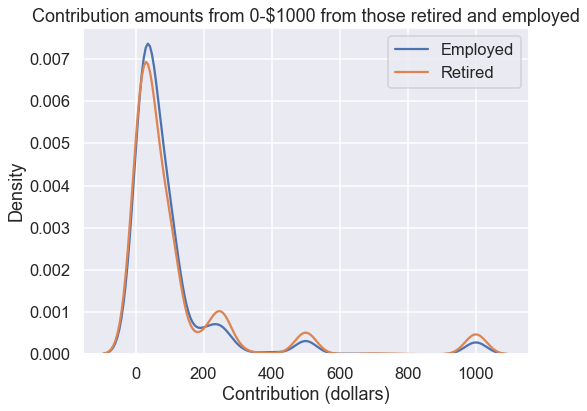

In [97]:
#@ 10 Create a double density plot showing the distribution of
# contribution amounts from those with employment_status values
# of RETIRED and EMPLOYED.  Include only contributions of $0-1000.
# Use Seaborn, and make sure to include
# a legend.
# Hint: consider creating two series, one for the contributions
# from retired contributors, and one for the contributions from
# employed contributors.
def replace_employment(input):
    if ((input != 'RETIRED') and (input != 'NOT EMPLOYED')):
        input = 'EMPLOYED'
    return input

df['employment_status'] = df['contbr_occupation'].apply(replace_employment)

sns.kdeplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000) & (df['employment_status'] == 'RETIRED')]['contb_receipt_amt']).set(title='Contribution amounts from 0-$1000 from those retired and employed', xlabel='Contribution (dollars)',ylabel='')
sns.kdeplot(df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000) & (df['employment_status'] == 'EMPLOYED')]['contb_receipt_amt']).legend(labels=["Employed","Retired"])


It appears that contributions from the retired and the employed are pretty similar, although there is a significant difference when you focus on larger contributions.  Let's look more into the size of contributions from those who are employed, retired, or unemployed.  

[Text(0.5, 1.0, 'Contribution amounts from 0-$250 by employment status'),
 Text(0, 0.5, 'Contribution (dollars)'),
 Text(0.5, 0, 'Employment status')]

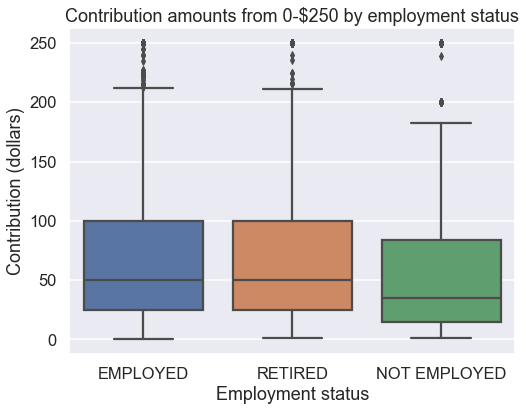

In [98]:
#@ 11 Create a box plot of contribution amounts for each employment
# status category.  Use Seaborn to create the bar plot, and show
# only contributions in the range of $0-250.
# Hint: you may want to create a version of df that contains only
# contributions in the 0-250 range.
def replace_employment(input):
    if ((input != 'RETIRED') and (input != 'NOT EMPLOYED')):
        input = 'EMPLOYED'
    return input

df['employment_status'] = df['contbr_occupation'].apply(replace_employment)

sns.boxplot(y=df.loc[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 250)]['contb_receipt_amt'],x=df['employment_status']).set(title='Contribution amounts from 0-$250 by employment status', ylabel='Contribution (dollars)',xlabel='Employment status')


Previously we looked at the number of contributions from different occupations.  What about the size of contributions from different occupations?  Let's focus on a few occupations that contribute a lot.

[Text(0.5, 1.0, 'Avg contributions by select occupations'),
 Text(0.5, 0, 'Occupation'),
 Text(0, 0.5, 'Average contribution')]

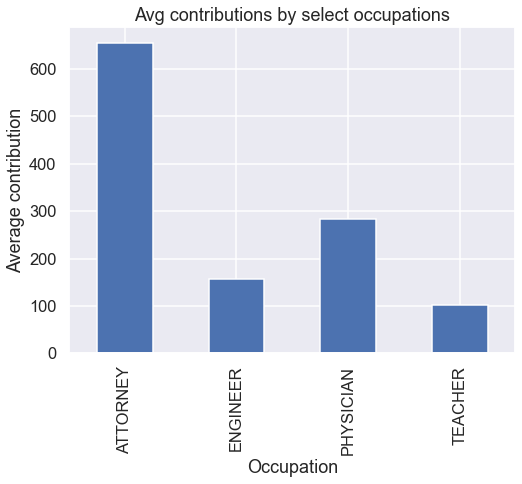

In [99]:
#@ 12 Create a bar plot showing the average contribution amount
# for the occupations 'ATTORNEY', 'TEACHER', 'ENGINEER' and 'PHYSICIAN'.
# Include contributions of any amount.  Use Pandas to create the bar plot.
# Show the occupations in decreasing order of mean contribution amount.
# Hint: you may want to create a new data frame that is like df except
# that it only includes data associated with the four occupations.
# To do this, consider the Pandas method pd.Series.isin 
df[df['contbr_occupation'].isin({'ATTORNEY','TEACHER','ENGINEER','PHYSICIAN'})].groupby(df['contbr_occupation'])['contb_receipt_amt'].mean().plot.bar().set(title='Avg contributions by select occupations',xlabel='Occupation',ylabel='Average contribution')
